## <div style="background-color:pink;color:white;padding:5px;"><span style="color:white"><u><b>Members</b></u></span></div> 
1. สมิตานัน ชัยนิลพันธุ์ 6241225426 
2. ทศวรรณ สิริธนาวุฒิ 6241078526
3. พชร ยะเขียว 6241144226 
4. ธัชกาญจน์ กุลมา 6241094526 
5. ณัฐวัฒน์ วัฒนพงศ์ศิริ 6241069926 

## <div style="background-color:pink;color:white;padding:5px;"><span style="color:white"><u><b>วิเคราะห์ข้อมูลและคาดเดาปัจจัยที่ก่อให้เกิดความเสี่ยงต่อการเป็นโรคหัวใจวายของกลุ่มตัวอย่าง</b></u></span></div> 

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io

In [77]:
url = "https://raw.githubusercontent.com/NattawatWattanapongsiri/Cardio-Vascular/main/heart.csv"
w = requests.get(url).content
df = pd.read_csv(io.StringIO(w.decode("utf-8")))

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [79]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


- cp = Chest Pain type chest pain type
- trtbps = resting blood pressure (in mm Hg)
- chol = cholestoral in mg/dl fetched via BMI sensor
- fbs = (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg = resting electrocardiographic results
- thalachh = Maximum heart rate achieved
- oldpeak = Previous peak
- slp = Slopecaa = Number of major vessels
- thall = Thalium Stress Test result ~ (0,3)
- exng = Exercise induced angina ~ 1 = Yes, 0 = No
- output = Target variable


In [80]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## <span style="color:Yellow">ทำการตรวจสอบข้อมูลว่าไม่มีค่า NaN DataFrame</span> ## 

In [81]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]

In [82]:
df[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Text(0.5, 0, '')

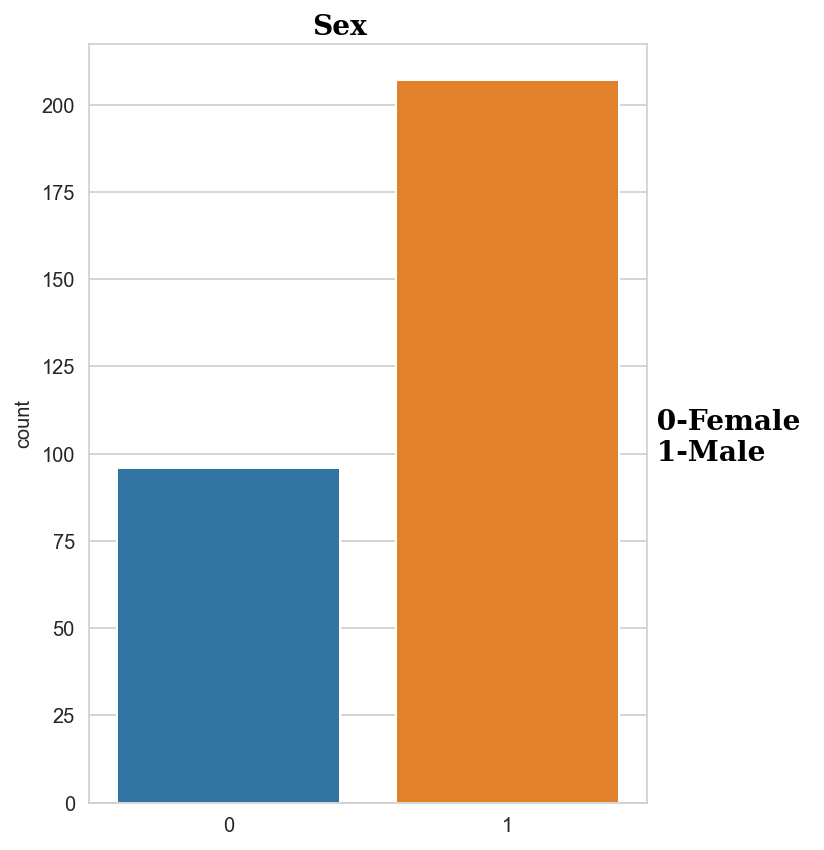

In [83]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax = fig.add_subplot(gs[0,1])

background_color = "white"
fig.patch.set_facecolor(background_color) 


# Sex count
ax.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="black")
sns.countplot(ax=ax,data=df,x='sex')
ax.text(1.5, 98, ' 0-Female \n 1-Male', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax.set_xlabel("")

จากกราฟ ข้อมูลประกอบด้วยจำนวนผู้ที่มีเพศหมายเลข 1 มากกว่าเป็นสองเท่าของหมายเลข 0 
- ซึ่งหมายเลข 0 คือผู้หญิงและหมายเลข 1 คือผู้ชาย

Text(0, 0.5, 'cholesterol')

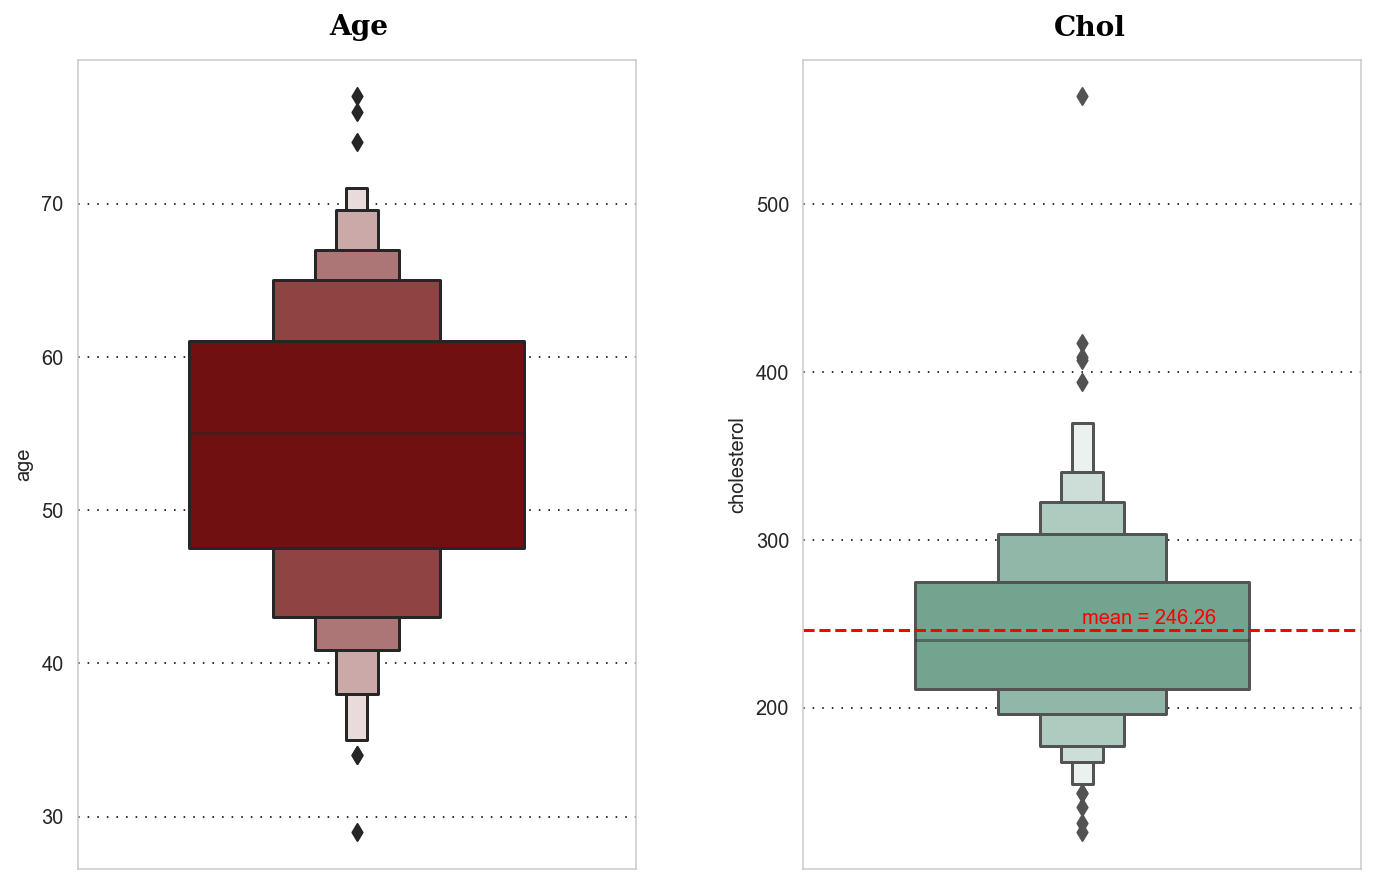

In [84]:
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])

background_color = "white"
fig.patch.set_facecolor(background_color) 

# Age 
ax1.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=df['age'],palette=["#800000"],width=0.6)

# Chol 
ax2.text(-0.05, 600, 'Chol', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=df['chol'],palette=["#6aac90"],width=0.6)
plt.axhline(y=df['chol'].mean(), linestyle='--', color='red')
ax2.text(0, 250,f"mean = {df.chol.mean():.2f}", color='red')
ax2.set_ylabel("cholesterol")

กลุ่มอายุส่วนใหญ่ของกลุ่มตัวอย่างอยู่ที่ช่วงวัย 50-60 ปี และค่าคลอเลสเตอรอลของกลุ่มตัวอย่างเฉลี่ยอยู่ที่ 246.26

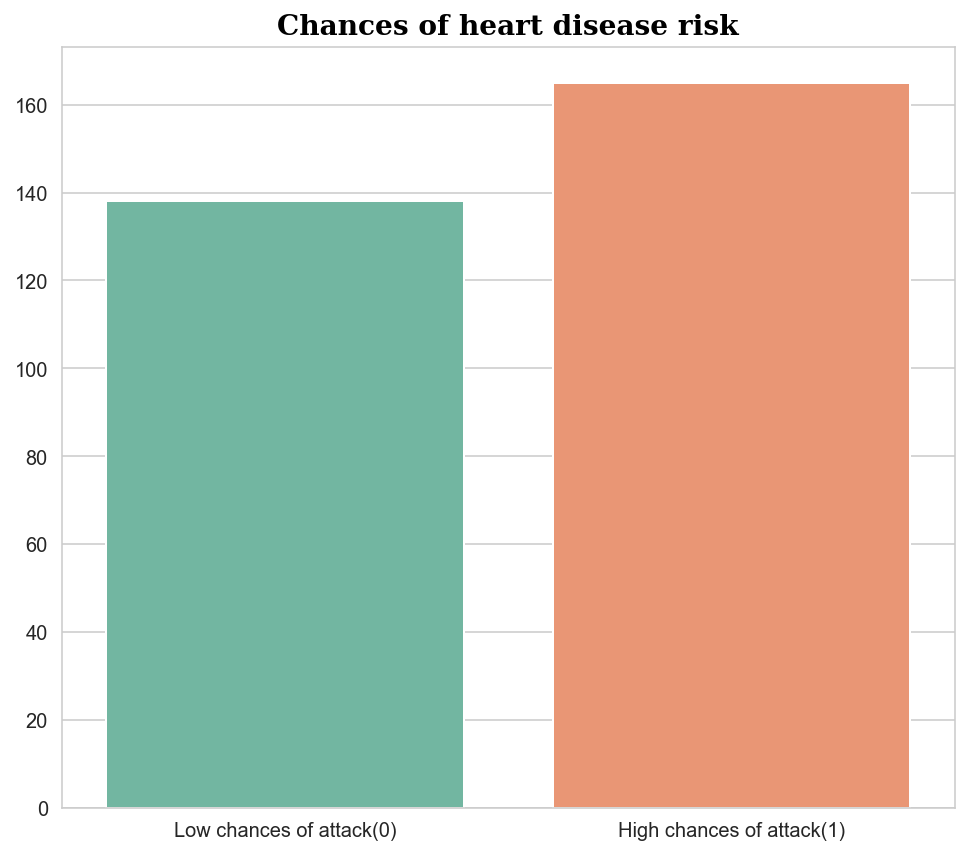

In [85]:
fig, ax = plt.subplots(figsize=(8, 7))

background_color = "white"
fig.patch.set_facecolor(background_color) 

plt.title("Chances of heart disease risk",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
sns.countplot(x='output',  data = df, palette="Set2")
ax.set_xticklabels(["Low chances of attack(0)","High chances of attack(1)"])
ax.set_xlabel("")
ax.set_ylabel("");

จาก Dataframe ผู้ที่มีความเสี่ยงสูงต่อการเป็นโรคหัวใจวายมีมากเกินครึ่งจากกลุ่มตัวอย่างทั้งหมด

## <div style="background-color:pink;color:white;padding:5px;"><span style="color:white"><u><b>การวิเคราะห์ สองตัวแปร</b></u></span></div> 

Text(68, 0.0229, ' Low chances of attack(0)\n High chances of attack(1)')

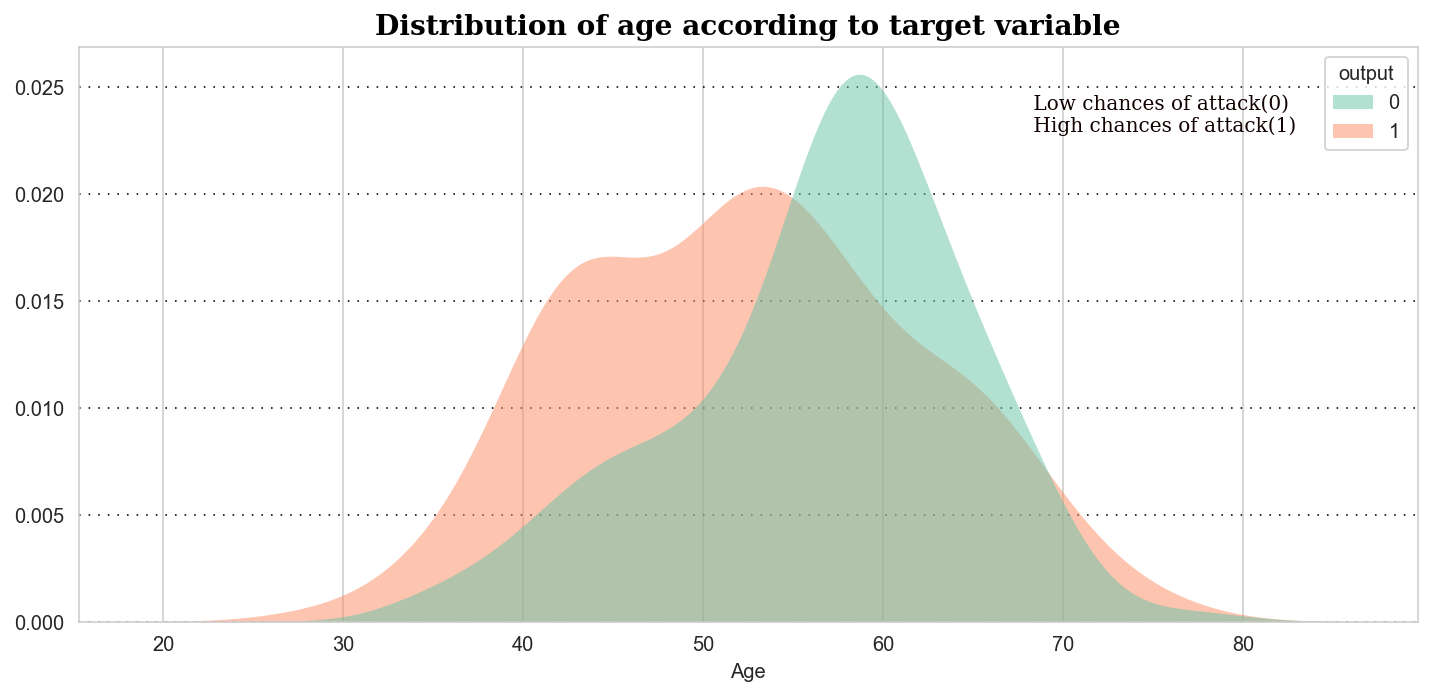

In [86]:
fig = plt.figure(figsize=(30,37))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax = fig.add_subplot(gs[0,1])

background_color = "white"
fig.patch.set_facecolor(background_color) 

# Age
ax.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax, data=df, x='age',hue="output", fill=True,palette="Set2", alpha=.5, linewidth=0)
ax.set_xlabel("Age")
ax.set_ylabel("")
plt.title("Distribution of age according to target variable",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax.text(68, 0.0229, ' Low chances of attack(0)\n High chances of attack(1)', fontsize=10, fontfamily='serif', color="#110100")

หากคิดตามความเชื่อเราอาจจะคิดว่าผู้ที่มีอายุมากกว่าย่อมมีโอกาสเป็นโรคหัวใจวายมากกว่าแต่จากแผนภาพการกระจายด้านบนนั้นแสดงให้เห็นว่าไม่จำเป็นเสมอไป

Text(468, 0.004222, ' Low chances of attack(0)\n High chances of attack(1)')

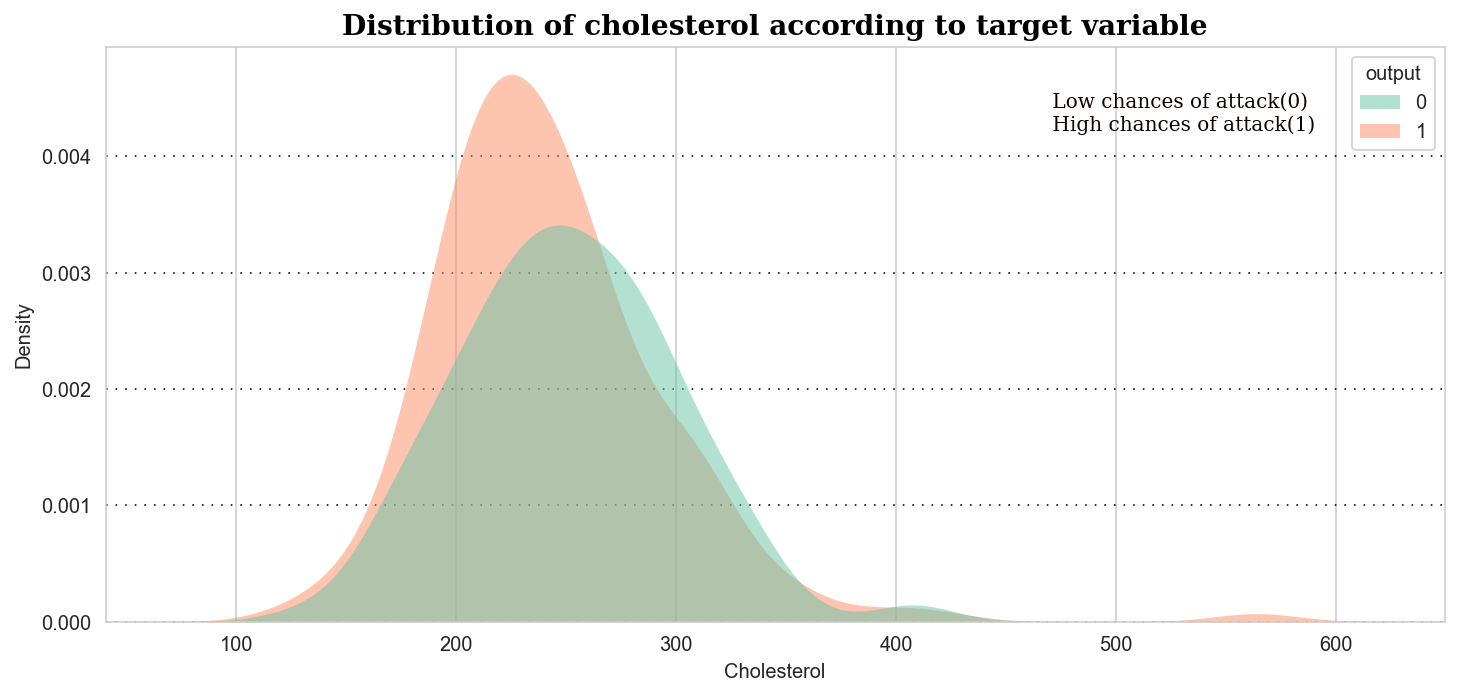

In [87]:
fig = plt.figure(figsize=(30,37))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax = fig.add_subplot(gs[0,1])

background_color = "white"
fig.patch.set_facecolor(background_color) 

ax.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax, data=df, x='chol',hue="output", fill=True,palette="Set2", alpha=.5, linewidth=0)
ax.set_xlabel("Cholesterol")
plt.title("Distribution of cholesterol according to target variable",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax.text(468, 0.004222, ' Low chances of attack(0)\n High chances of attack(1)', fontsize=10, fontfamily='serif', color="#110100")


จากกราฟการกระจายนั้นแสดงให้เห็นว่าค่าของคลอเลสเตอรอลอาจไม่ใช่ปัจจัยหลักสำคัญที่ก่อให้เกิดโอกาสที่จะเป็นโรคหัวใจวาย

In [88]:
df_corr = df[con_cols].corr().transpose()
df_corr

,age,trtbps,chol,thalachh,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


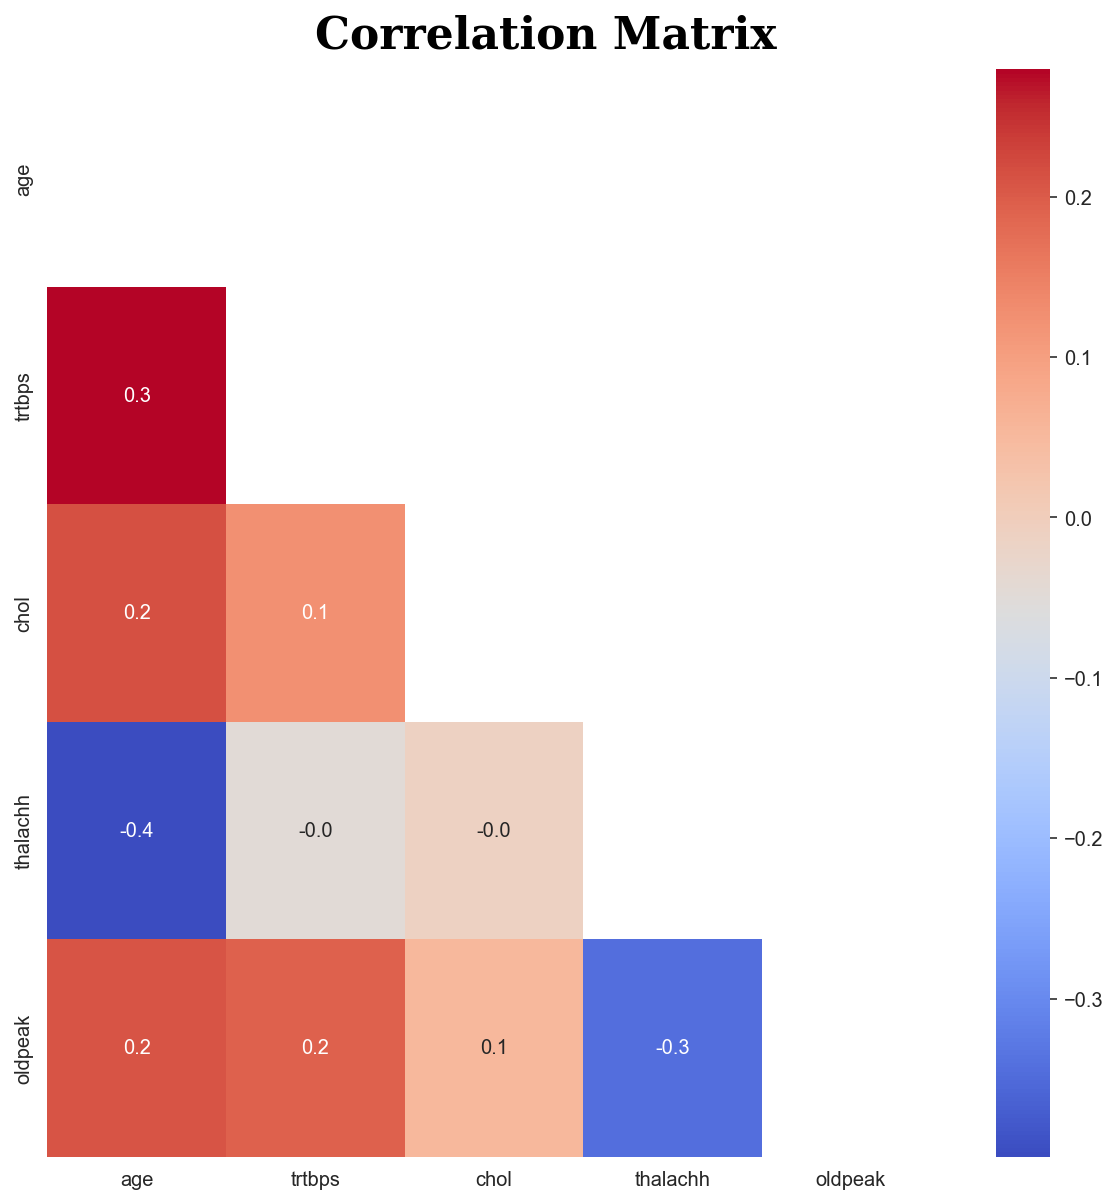

In [89]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

background_color = "white"
fig.patch.set_facecolor(background_color) 

df_corr = df[con_cols].corr().transpose()
color_palette = ["#8cb5b5","#ff284b"]
mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="black")

sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True,cmap='coolwarm')
plt.show()

จากกราฟ Heatmap ด้านบนสามารถบอกได้ว่าไม่มีความสัมพันธ์เชิงเส้นตรงที่ชัดเจนระหว่างตัวแปรแบบต่อเนื่อง

Text(1.5, 98, ' 0-Female \n 1-Male')

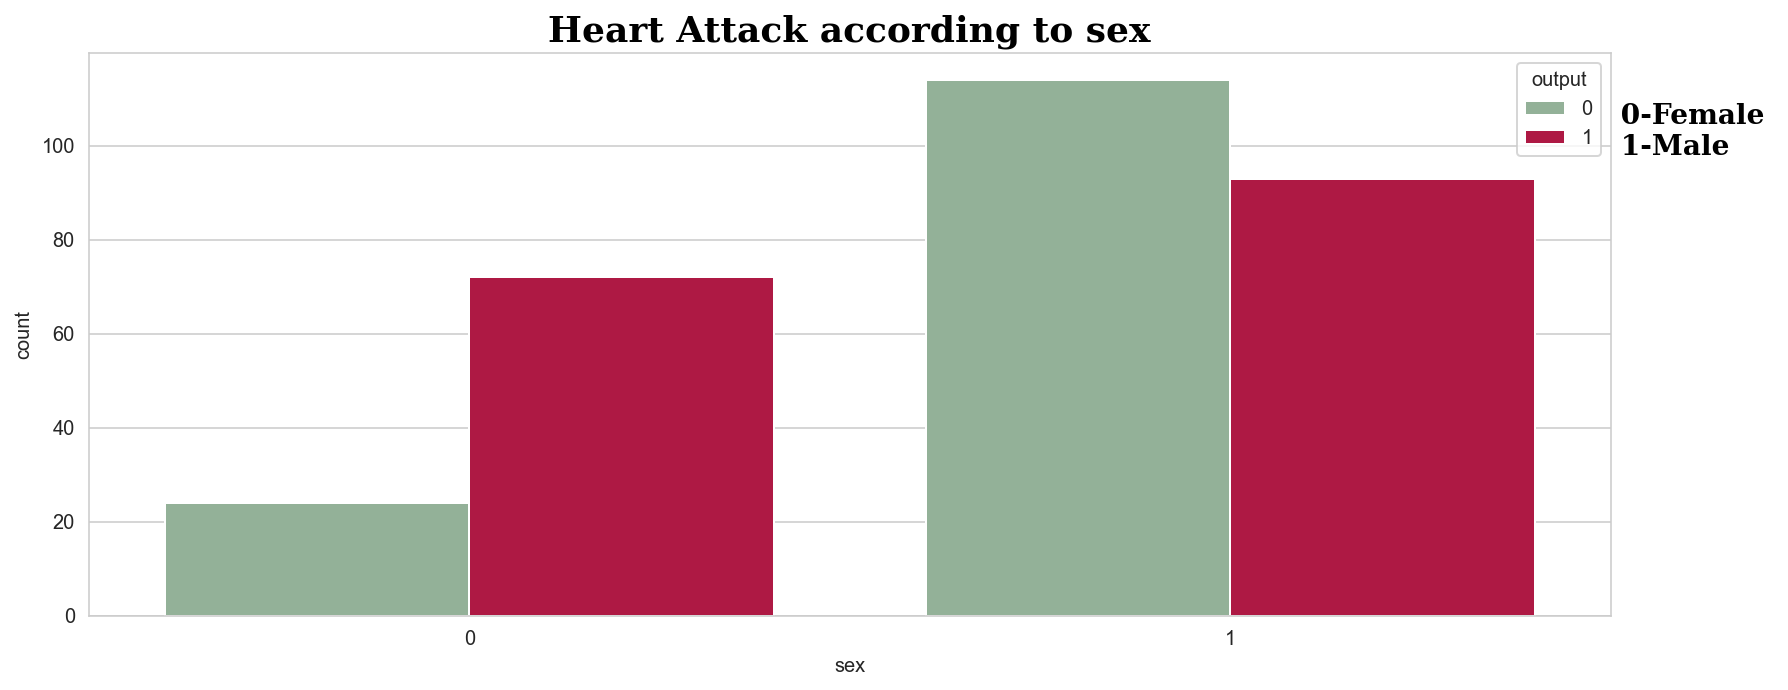

In [90]:
fig = plt.figure(figsize=(30,30))
gs = fig.add_gridspec(5,2)

background_color = "white"
fig.patch.set_facecolor(background_color) 

ax = fig.add_subplot(gs[0,1])
sns.countplot(ax=ax,data=df,x='sex',palette=["#8eb695","#c70039"], hue='output')
# sns.countplot(ax=ax,data=df,x='sex')
plt.title("Heart Attack according to sex", fontweight='bold', fontfamily='serif', size=18, color='black'); #      0-Female     1-Male
ax.text(1.5, 98, ' 0-Female \n 1-Male', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

จาก DataFrame นั้น คนที่มีเพศหมายเลข 1 หรือเพศชายนั้น มีโอกาสสูงที่จะหัวใจวายมากกว่าเพศหญิง

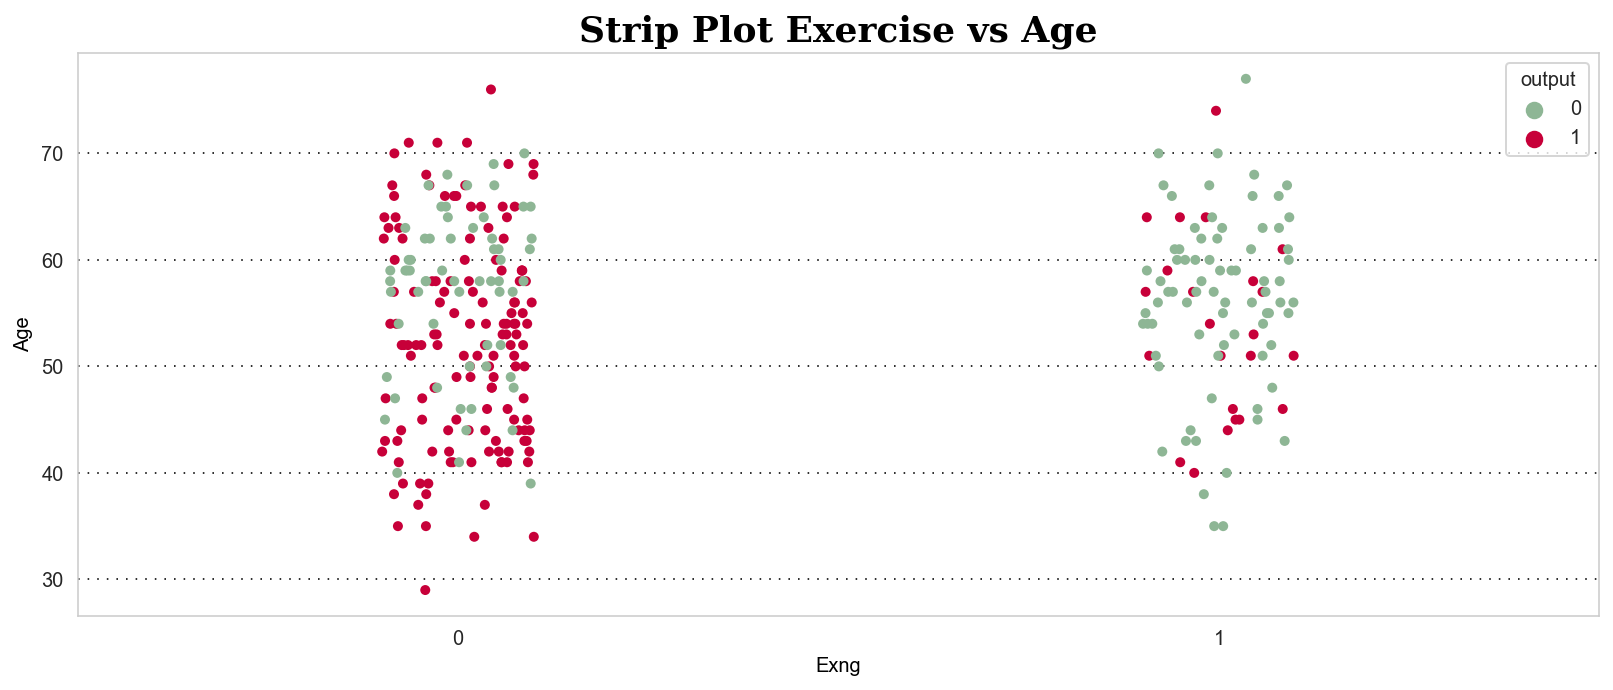

In [91]:
fig = plt.figure(figsize=(30,30))
gs = fig.add_gridspec(5,2)

background_color = "white"
fig.patch.set_facecolor(background_color) 

ax = fig.add_subplot(gs[0,1])
ax.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.stripplot(ax=ax, data=df,x='exng',y='age',hue='output',palette=["#8eb695","#c70039"])
ax.set_xlabel("Exng", color='black')
ax.set_ylabel("Age", color='black')
plt.title("Strip Plot Exercise vs Age", size=18, fontweight='bold', fontfamily='serif', color='black');

ความสัมพันธุ์ระหว่างการออกกำลังกายที่ทำให้เกิดหลอดเลือดหัวใจตีบ(Exng) กับ อายุ(Age) โดย Exng(0) = ไม่  Exng(1) = ใช่
จะเห็นได้ว่าผู้ที่ไม่ได้ออกกำลังกายจะเกิดอาการเจ็บหน้าอก นั่นคือ exng = 0 มีโอกาสหัวใจวายสูงขึ้น

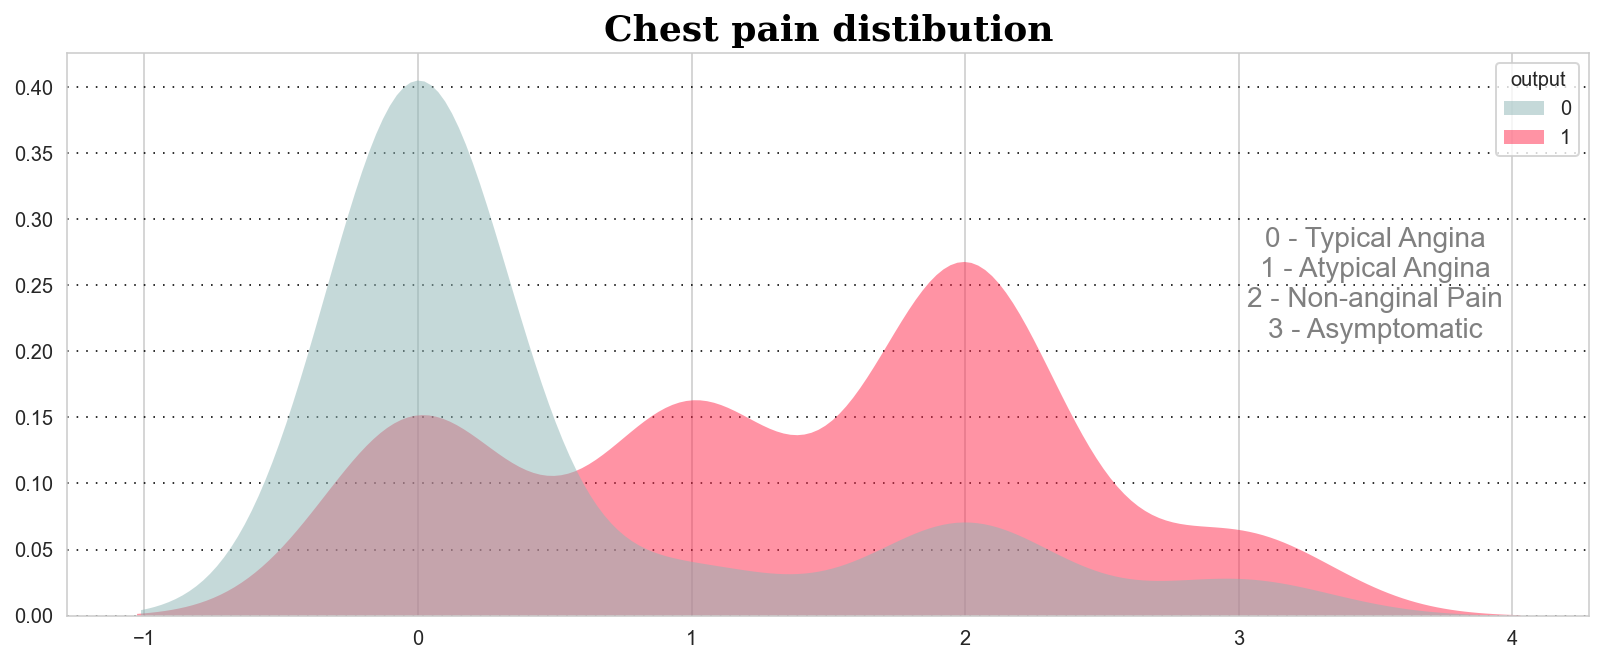

In [92]:
fig = plt.figure(figsize=(30,30))
gs = fig.add_gridspec(5,2)

ax = fig.add_subplot(gs[0,1])
ax.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

background_color = "white"
fig.patch.set_facecolor(background_color) 

sns.kdeplot(ax=ax, data=df, x='cp',hue="output", fill=True,palette=["#8cb5b5","#ff284b"], alpha=.5, linewidth=0)
ax.set_xlabel("")
ax.set_ylabel("")
plt.title("Chest pain distibution", size=18, fontweight='bold', fontfamily='serif',color='Black')
ax.text(3.5,0.25,"0 - Typical Angina\n1 - Atypical Angina\n2 - Non-anginal Pain\n3 - Asymptomatic",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14, color='grey');

ผู้ที่มีอาการ Non-anginal chest pain นั่นคือค่า cp = 2 นั้น จะมีโอกาสหัวใจวายสูงขึ้น

# `ML Technique`

In [93]:
import pandas as pd
import seaborn as sns
import numpy as np
import csv as csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [94]:
df=pd.read_csv('https://raw.githubusercontent.com/NattawatWattanapongsiri/Cardio-Vascular/main/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## <div style="background-color:#E33131;color:white;padding:10px;"><span style="color:white"><u><b>Create Dummy Variable</b></u></span></div>

In [95]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thall'], prefix = "thall")
c = pd.get_dummies(df['slp'], prefix = "slp")

In [96]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,...,cp_1,cp_2,cp_3,thall_0,thall_1,thall_2,thall_3,slp_0,slp_1,slp_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [97]:
df = df.drop(columns = ['cp', 'thall', 'slp'])
df.head()

,age,sex,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,caa,...,cp_1,cp_2,cp_3,thall_0,thall_1,thall_2,thall_3,slp_0,slp_1,slp_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


## <div style="background-color:#E33131;color:white;padding:5px;"><span style="color:white"><u><b>Create Test Data</b></u></span></div>

In [98]:
y = df.output.values
x = df.drop(['output'], axis = 1)

In [99]:
x = (x - np.min(x)) / (np.max(x) - np.min(x)).values

C:\Users\Tulip\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Tulip\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Tulip\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [100]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

# `K-Nearest Neighbour (KNN) Classification`

In [101]:
from sklearn.neighbors import KNeighborsClassifier
accuracies = {}
knn = KNeighborsClassifier(n_neighbors = 3)  # n_neighbors means k
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test, y_test)*100))

2 NN Score: 88.52%


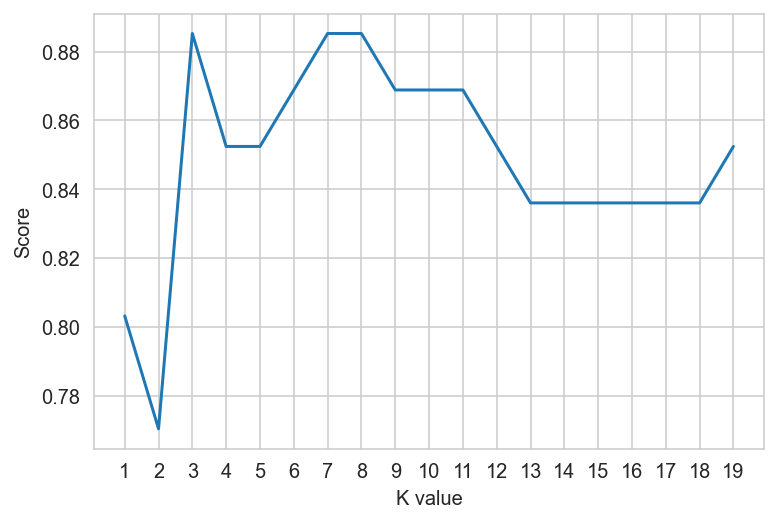

Maximum KNN Score is 88.52%


In [102]:
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train, y_train)
    scoreList.append(knn2.score(x_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

## <div style="background-color:green;color:white;padding:5px;"><span style="color:white"><u><b>KNN Model's Accuracy is 88.52%</b></u></span></div> 

In [103]:
predicted_knn = knn.predict(x_test)
predicted_knn

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [104]:
y_test

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

# `Random Forest Classification`

In [105]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf.fit(x_train, y_train)

acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 88.52%


## <div style="background-color:green;color:white;padding:5px;"><span style="color:white"><u><b>Test Accuracy of Random Forest is 88.52%</b></u></span></div>

In [106]:
predicted_rf = knn.predict(x_test)
predicted_rf

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [107]:
y_test

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

# `Naive Bayes Algorithm`

In [108]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

acc = nb.score(x_test,y_test)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 86.89%


## <div style="background-color:green;color:white;padding:5px;"><span style="color:white"><u><b>Accuracy of Naive Bayes is 86.89%</b></u></span></div>

In [109]:
predicted_nb = knn.predict(x_test)
predicted_nb

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [110]:
y_test

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

# `Comparing Models`

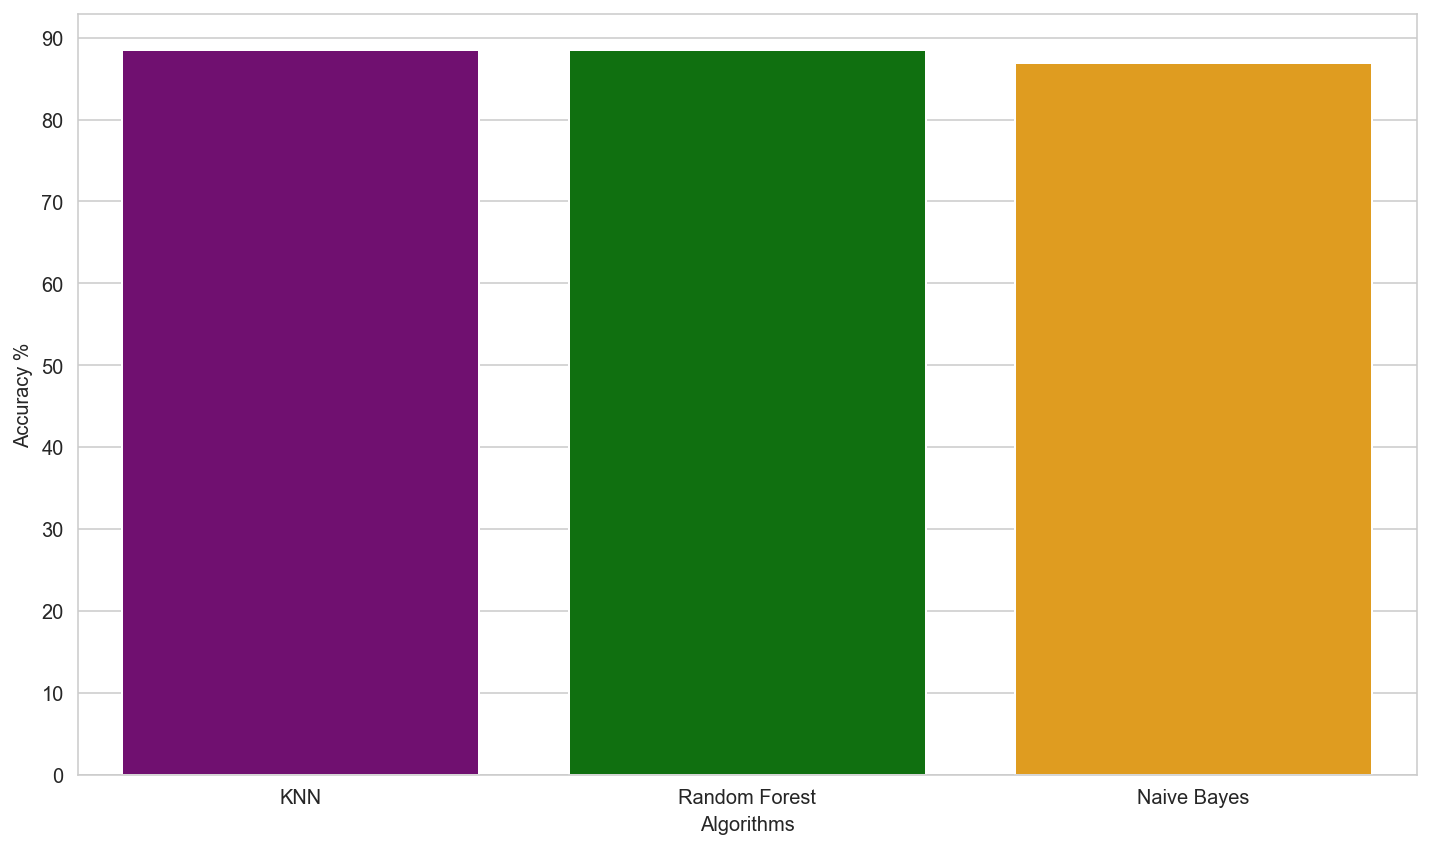

In [126]:
colors = ["purple", "green", "orange"]

sns.set_style("whitegrid")
plt.figure(figsize=(12,7))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

## <div style="background-color:red;color:white;padding:5px;"><span style="color:white"><u><b>Confusion Matrix</b></u></span></div>

In [112]:
# Predicted values
y_head_knn = knn.predict(x_test)
y_head_nb = nb.predict(x_test)
y_head_rf = rf.predict(x_test)

In [113]:
from sklearn import metrics

cm_knn = metrics.confusion_matrix(y_test,y_head_knn)
cm_nb = metrics.confusion_matrix(y_test,y_head_nb)
cm_rf = metrics.confusion_matrix(y_test,y_head_rf)

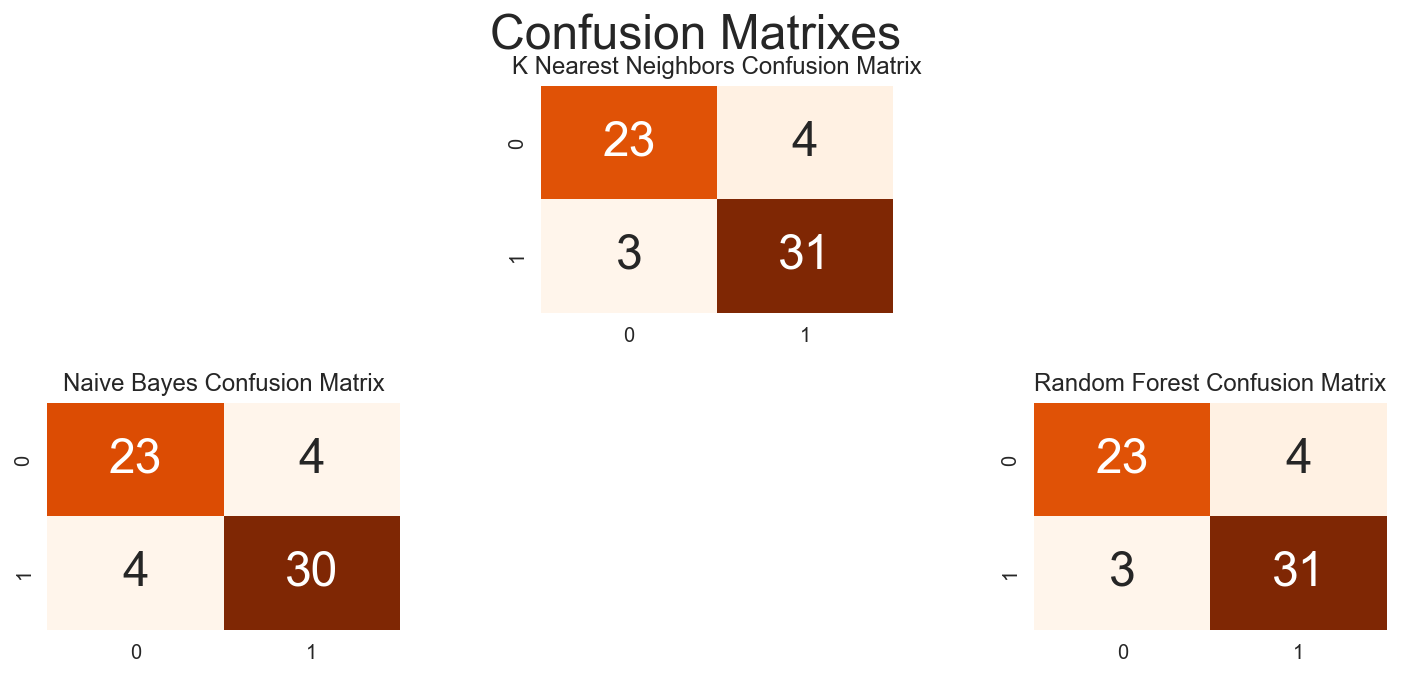

In [114]:
plt.figure(figsize=(12,5))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Oranges",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Oranges",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Oranges",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

In [128]:
print("K Nearest Neighbors Confusion Matrix")
print(metrics.classification_report(y_test,y_head_knn))
print("Random Forest Confusion Matrix")
print(metrics.classification_report(y_test,y_head_rf))
print("Naive Bayes Confusion Matrix")
print(metrics.classification_report(y_test,y_head_nb))

K Nearest Neighbors Confusion Matrix
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61

Random Forest Confusion Matrix
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61

Naive Bayes Confusion Matrix
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.